# 1.1.1-1.1.3

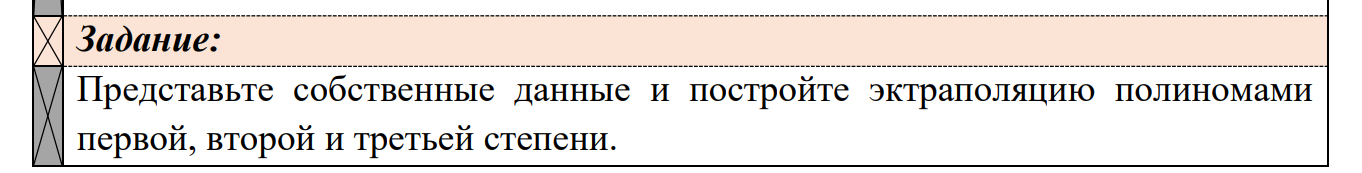

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
2.749999999999999 -2.4999999999999982


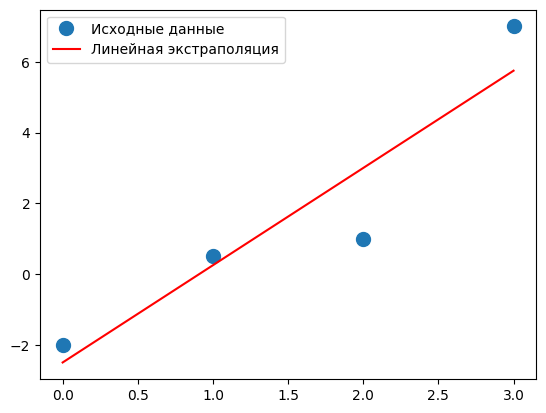

In [8]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-2, 0.5, 1, 7])

# y = A*p, A = [[x1]] p = [[m], [c]]

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m,c)

import matplotlib.pyplot as plt
plt.plot(x,y,'o',label='Исходные данные', markersize = 10)
plt.plot(x,m*x +c,'r',label='Линейная экстраполяция')
plt.legend()
plt.show()


[-5.36646698 -3.58935135 -2.94159243 -2.27192533 -1.28363554  0.36127493
  0.61143802  1.62610012  2.90925645  4.27269486  4.59651973] [3.62822127 3.91996095 4.00919699 3.7268115  3.79222301 4.25658072
 4.46785555 3.84898359 3.57043872 4.37840574 3.6672312 ]


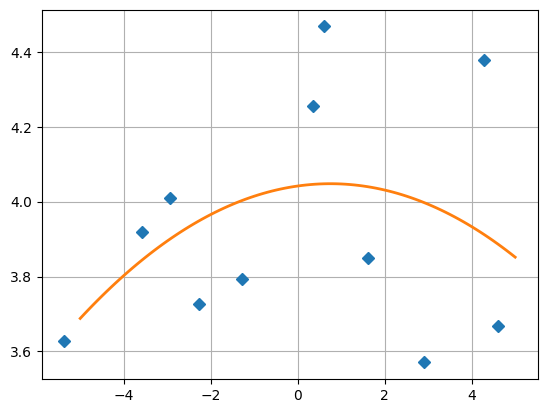

In [12]:
from numpy import *
from numpy.random import *
#случайные х y
delta = 1.0
x = linspace(-5,5,11)
y = 2**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = np.fromfile('x_data.txt', float, sep = '\n')
y = np.fromfile('y_data.txt', float, sep = '\n')
print(x, y)

#нахождение коэффициентов функции y=ax^2+bx+c методом наименьших квадратов
m = vstack((x**2, x, ones(11))).T
# нахождение коэффициентов при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5,5,101)
#рисуем точки
import matplotlib.pyplot as plt
plt.plot(x,y,'D')

plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')


[-5.46633044 -4.26440559 -3.31940586 -1.6883773  -0.76612871  0.20447861
  1.23472888  2.10579615  2.69437396  4.12658799  4.91805421] [3.56454656 3.58293862 4.40177856 4.49837445 4.16534549 4.04625778
 3.55200651 4.47396694 4.39083003 3.94603273 4.17318753]


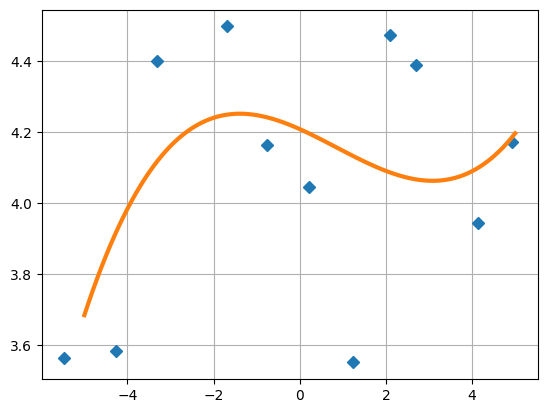

In [13]:
from numpy import *
from numpy.random import *
#случайные х y
delta = 1.0
x = linspace(-5,5,11)
y = 2**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = np.fromfile('x_data.txt', float, sep = '\n')
y = np.fromfile('y_data.txt', float, sep = '\n')
print(x, y)

#нахождение коэффициентов функции y=ax^2+bx+c методом наименьших квадратов
m = vstack((x**3, x**2, x, ones(11))).T
# нахождение коэффициентов при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5,5,101)
#рисуем точки
import matplotlib.pyplot as plt
plt.plot(x,y,'D')

plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')


[3.00635767 6.99103194]
0.00019982721054966402
0.1757101485633421


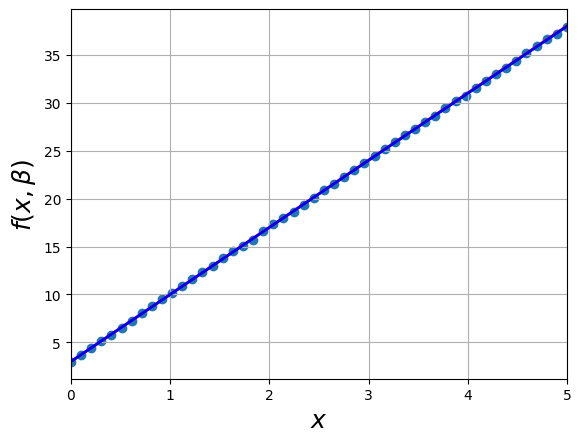

In [14]:
import numpy as np
import scipy.optimize



beta = (3, 7)
def f(x, b0, b1):
    return b0 +b1 * x
xdata = np.linspace(0,5,50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.grid()
plt.show()

[0.27704863 0.72379957 0.50535069]
0.00012813087080151256
0.10684773235157909


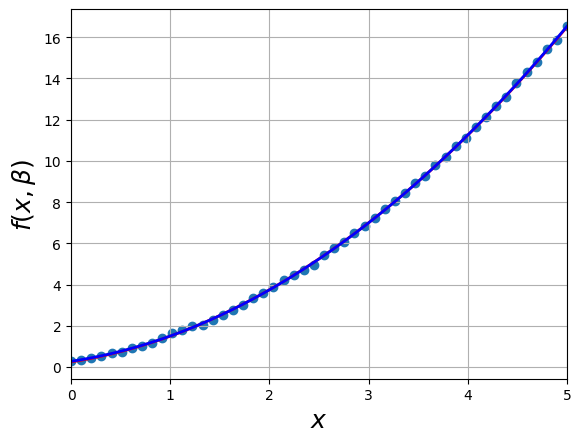

In [18]:
import numpy as np
import scipy.optimize



beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 +b1 * x + b2*x**2
# массив точек xi
xdata = np.linspace(0,5,50)
# теоретически верные yi
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.grid()
plt.show()

[1.99610624 5.00478093]
7.304697148923889e-05
0.168916840676182


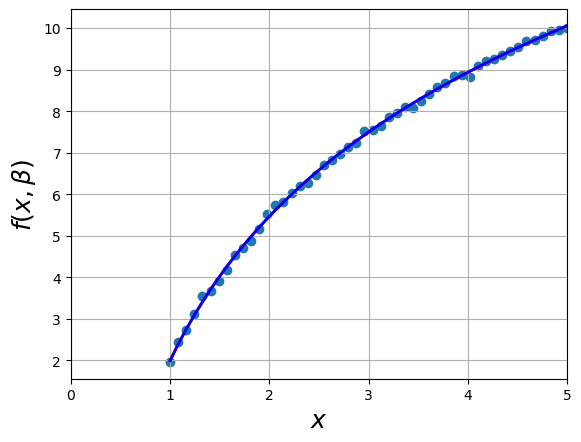

In [27]:
import numpy as np
import scipy.optimize



beta = (2, 5)
def f(x, b0, b1):
    return b0 +b1 * np.log(x)
# массив точек xi
xdata = np.linspace(1,5,50)
# теоретически верные yi
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.grid()
plt.show()

[2.01219098 4.99999587]
7.195296289887842e-05
0.11403535665670843


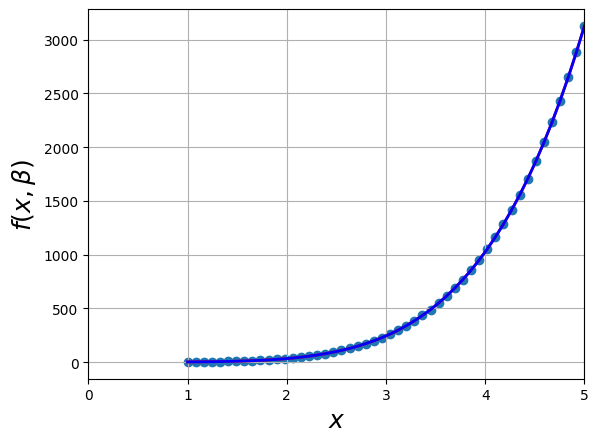

In [21]:
import numpy as np
import scipy.optimize



beta = (2, 5)
def f(x, b0, b1):
    return b0 + x**b1
# массив точек xi
xdata = np.linspace(1,5,50)
# теоретически верные yi
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.grid()
plt.show()

# 1.2...

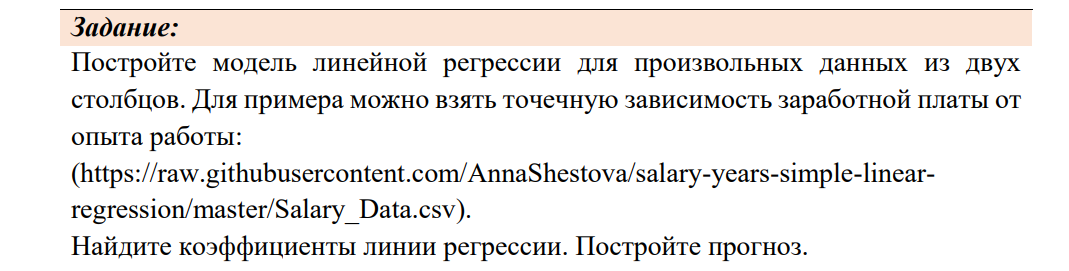

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)
dataset = pd.DataFrame(dataframe)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


(30, 2)


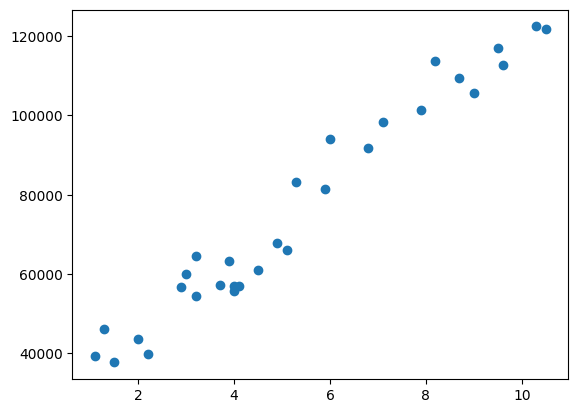

In [29]:
print(dataset.shape)
dataset.describe()
plt.scatter(dataset['YearsExperience'],dataset['Salary'])
plt.show()

In [30]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


In [31]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


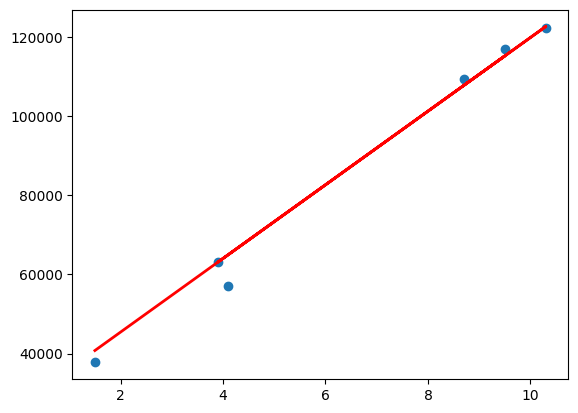

In [32]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

#3

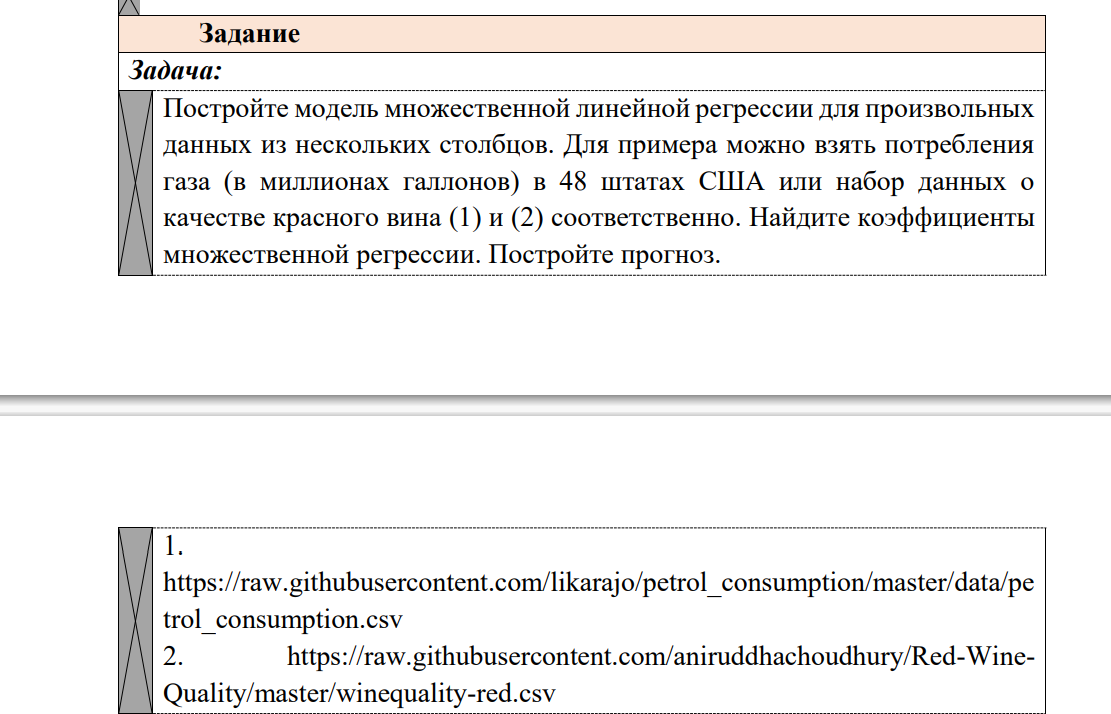

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
df1 = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
df2 = pd.read_csv(url)

df1 = df1.rename(columns = {'Petrol_tax':'y'}, inplace = False)
df2 = df2.rename(columns = {'fixed acidity':'x1', 'volatile acidity': 'x2', 'citric acid':'x3'}, inplace = False)

frames = [df1,df2]
dataset = pd.concat([df1,df2], axis = 1, join = "inner")
dataset.head()

,y,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption,x1,x2,x3,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.0,3571,1976,0.525,541,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,9.0,4092,1250,0.572,524,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,9.0,3865,1586,0.580,561,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,7.5,4870,2351,0.529,414,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,8.0,4399,431,0.544,410,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
print(dataset.shape)
dataset.describe()

(48, 17)


,y,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption,x1,x2,x3,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833,7.572917,0.560208,0.188750,2.691667,0.105562,15.854167,54.354167,0.996869,3.336875,0.688333,9.764583,5.291667
std,0.950770,573.623768,3491.507166,0.055470,111.885816,1.058449,0.176231,0.168442,1.767536,0.068237,10.532603,34.428149,0.001173,0.149853,0.228355,0.679953,0.742576
min,5.000000,3063.000000,431.000000,0.451000,344.000000,4.600000,0.220000,0.000000,1.200000,0.050000,3.000000,11.000000,0.993400,3.040000,0.460000,9.000000,4.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000,7.250000,0.430000,0.035000,1.800000,0.074750,9.000000,29.000000,0.996550,3.245000,0.547500,9.400000,5.000000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000,7.650000,0.595000,0.155000,2.050000,0.084500,13.500000,48.000000,0.996800,3.335000,0.585000,9.500000,5.000000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000,7.950000,0.656250,0.292500,2.525000,0.103500,17.000000,68.000000,0.997800,3.422500,0.800000,9.925000,6.000000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000,11.200000,1.130000,0.560000,10.700000,0.368000,52.000000,148.000000,0.999300,3.900000,1.560000,13.100000,7.000000


In [36]:
X = dataset[['x1','x2','x3']]
y = dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,-0.135426
x2,-0.692729
x3,-1.481770


In [37]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,9.0,7.857251
4,8.0,7.873321
26,8.0,7.691503
30,7.0,7.881713
32,8.0,7.604798
37,7.0,7.585301
34,8.0,8.064052
40,7.0,7.526609
7,8.0,7.921500
10,8.0,7.932705


In [38]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  0.29853841614174936


# 4

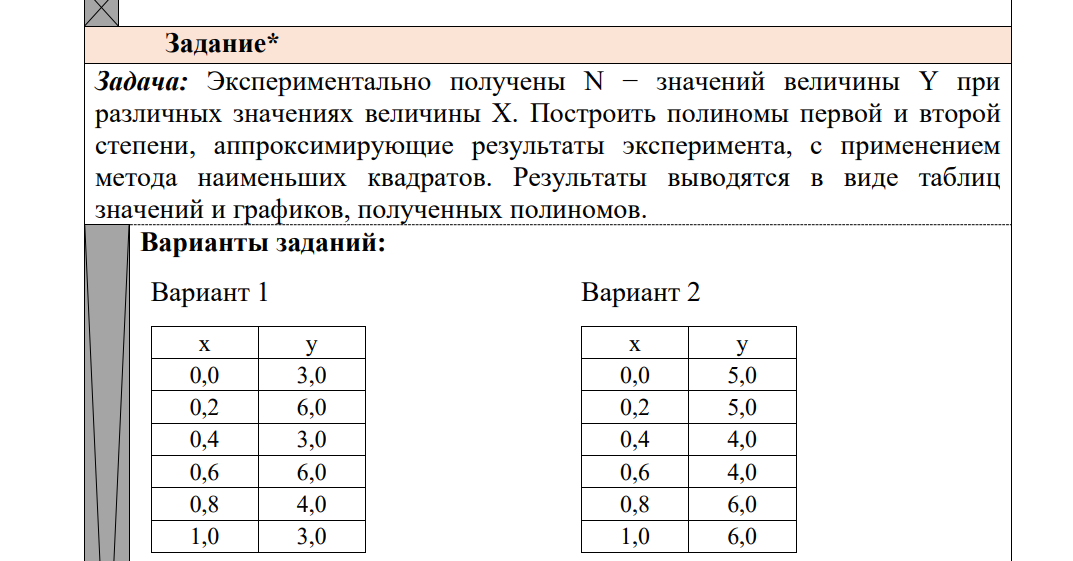

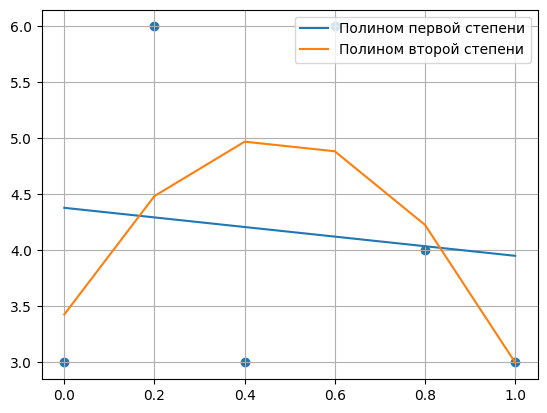

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=None)[0]
poly1 = a1 * x + b1

A = np.vstack([x**2, x, np.ones(len(x))]).T
a2, b2, c2 = np.linalg.lstsq(A, y, rcond=None)[0]
poly2 = a2 * x**2 + b2 * x + c2

plt.scatter(x, y)
plt.plot(x, poly1, label="Полином первой степени")
plt.plot(x, poly2, label="Полином второй степени")
plt.legend()
plt.grid()
plt.show()
